In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
fraud_data=pd.read_csv("Fraud_check.csv")
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

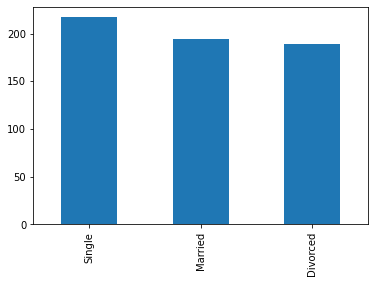

In [5]:
fraud_data['Marital.Status'].value_counts().plot(kind='bar')

In [6]:
Fraud_data=fraud_data.rename({'Taxable.Income':'Taxable_Income','City.Population':'City_Population',
                              'Work.Experience':'Work_Experience','Marital.Status':'Marital_Status'},axis=1)
Fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
data=pd.DataFrame(pd.cut(Fraud_data.Taxable_Income,bins=[0,30000,100000],labels=['Risky','Good']))
data

,Taxable_Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [8]:
Fraud_Data=Fraud_data.drop('Taxable_Income',axis=1)
Fraud_Data

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [9]:
Fraud_Data1=pd.concat([Fraud_Data,data],axis=1)
Fraud_Data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [10]:
Fraud_Data1['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

(0.0, 500.0)

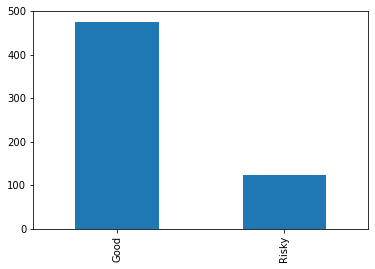

In [11]:
Fraud_Data1['Taxable_Income'].value_counts().plot(kind='bar')
plt.ylim(0,500)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Fraud_Data1['Undergrad']= label_encoder.fit_transform(Fraud_Data1['Undergrad'])
Fraud_Data1['Marital_Status']= label_encoder.fit_transform(Fraud_Data1['Marital_Status'])
Fraud_Data1['Urban']= label_encoder.fit_transform(Fraud_Data1['Urban'])
Fraud_Data1['Taxable_Income']= label_encoder.fit_transform(Fraud_Data1['Taxable_Income'])

In [13]:
Fraud_Data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
Fraud_Data2=pd.DataFrame(trans.fit_transform(Fraud_Data1.iloc[:,[2,3]]))
Fraud_Data2.head()

,0,1
0,0.139472,0.333333
1,0.622394,0.600000
2,0.772568,1.000000
3,0.962563,0.500000
4,0.010081,0.933333


In [15]:
Fraud_Data2.columns=['City_Population','Work_Experience']
Fraud_Data2.head()

,City_Population,Work_Experience
0,0.139472,0.333333
1,0.622394,0.600000
2,0.772568,1.000000
3,0.962563,0.500000
4,0.010081,0.933333


In [16]:
Fraud_Data3=Fraud_Data1.drop(['City_Population','Work_Experience'],axis=1)
Fraud_Data3

,Undergrad,Marital_Status,Urban,Taxable_Income
0,0,2,1,0
1,1,0,1,0
2,0,1,1,0
3,1,2,1,0
4,0,1,0,0
...,...,...,...,...
595,1,0,1,0
596,1,0,1,0
597,0,0,1,0
598,1,1,0,0


In [17]:
Fraud_Data4=pd.concat([Fraud_Data3,Fraud_Data2],axis=1)
Fraud_Data4.head()

,Undergrad,Marital_Status,Urban,Taxable_Income,City_Population,Work_Experience
0,0,2,1,0,0.139472,0.333333
1,1,0,1,0,0.622394,0.600000
2,0,1,1,0,0.772568,1.000000
3,1,2,1,0,0.962563,0.500000
4,0,1,0,0,0.010081,0.933333


In [18]:
x=Fraud_Data4.iloc[:,[0,1,2,4,5]]
y=Fraud_Data4.iloc[:,3]

In [19]:
x.head()

,Undergrad,Marital_Status,Urban,City_Population,Work_Experience
0,0,2,1,0.139472,0.333333
1,1,0,1,0.622394,0.600000
2,0,1,1,0.772568,1.000000
3,1,2,1,0.962563,0.500000
4,0,1,0,0.010081,0.933333


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Taxable_Income, dtype: int32

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Building Decision Tree Classifier using gini Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

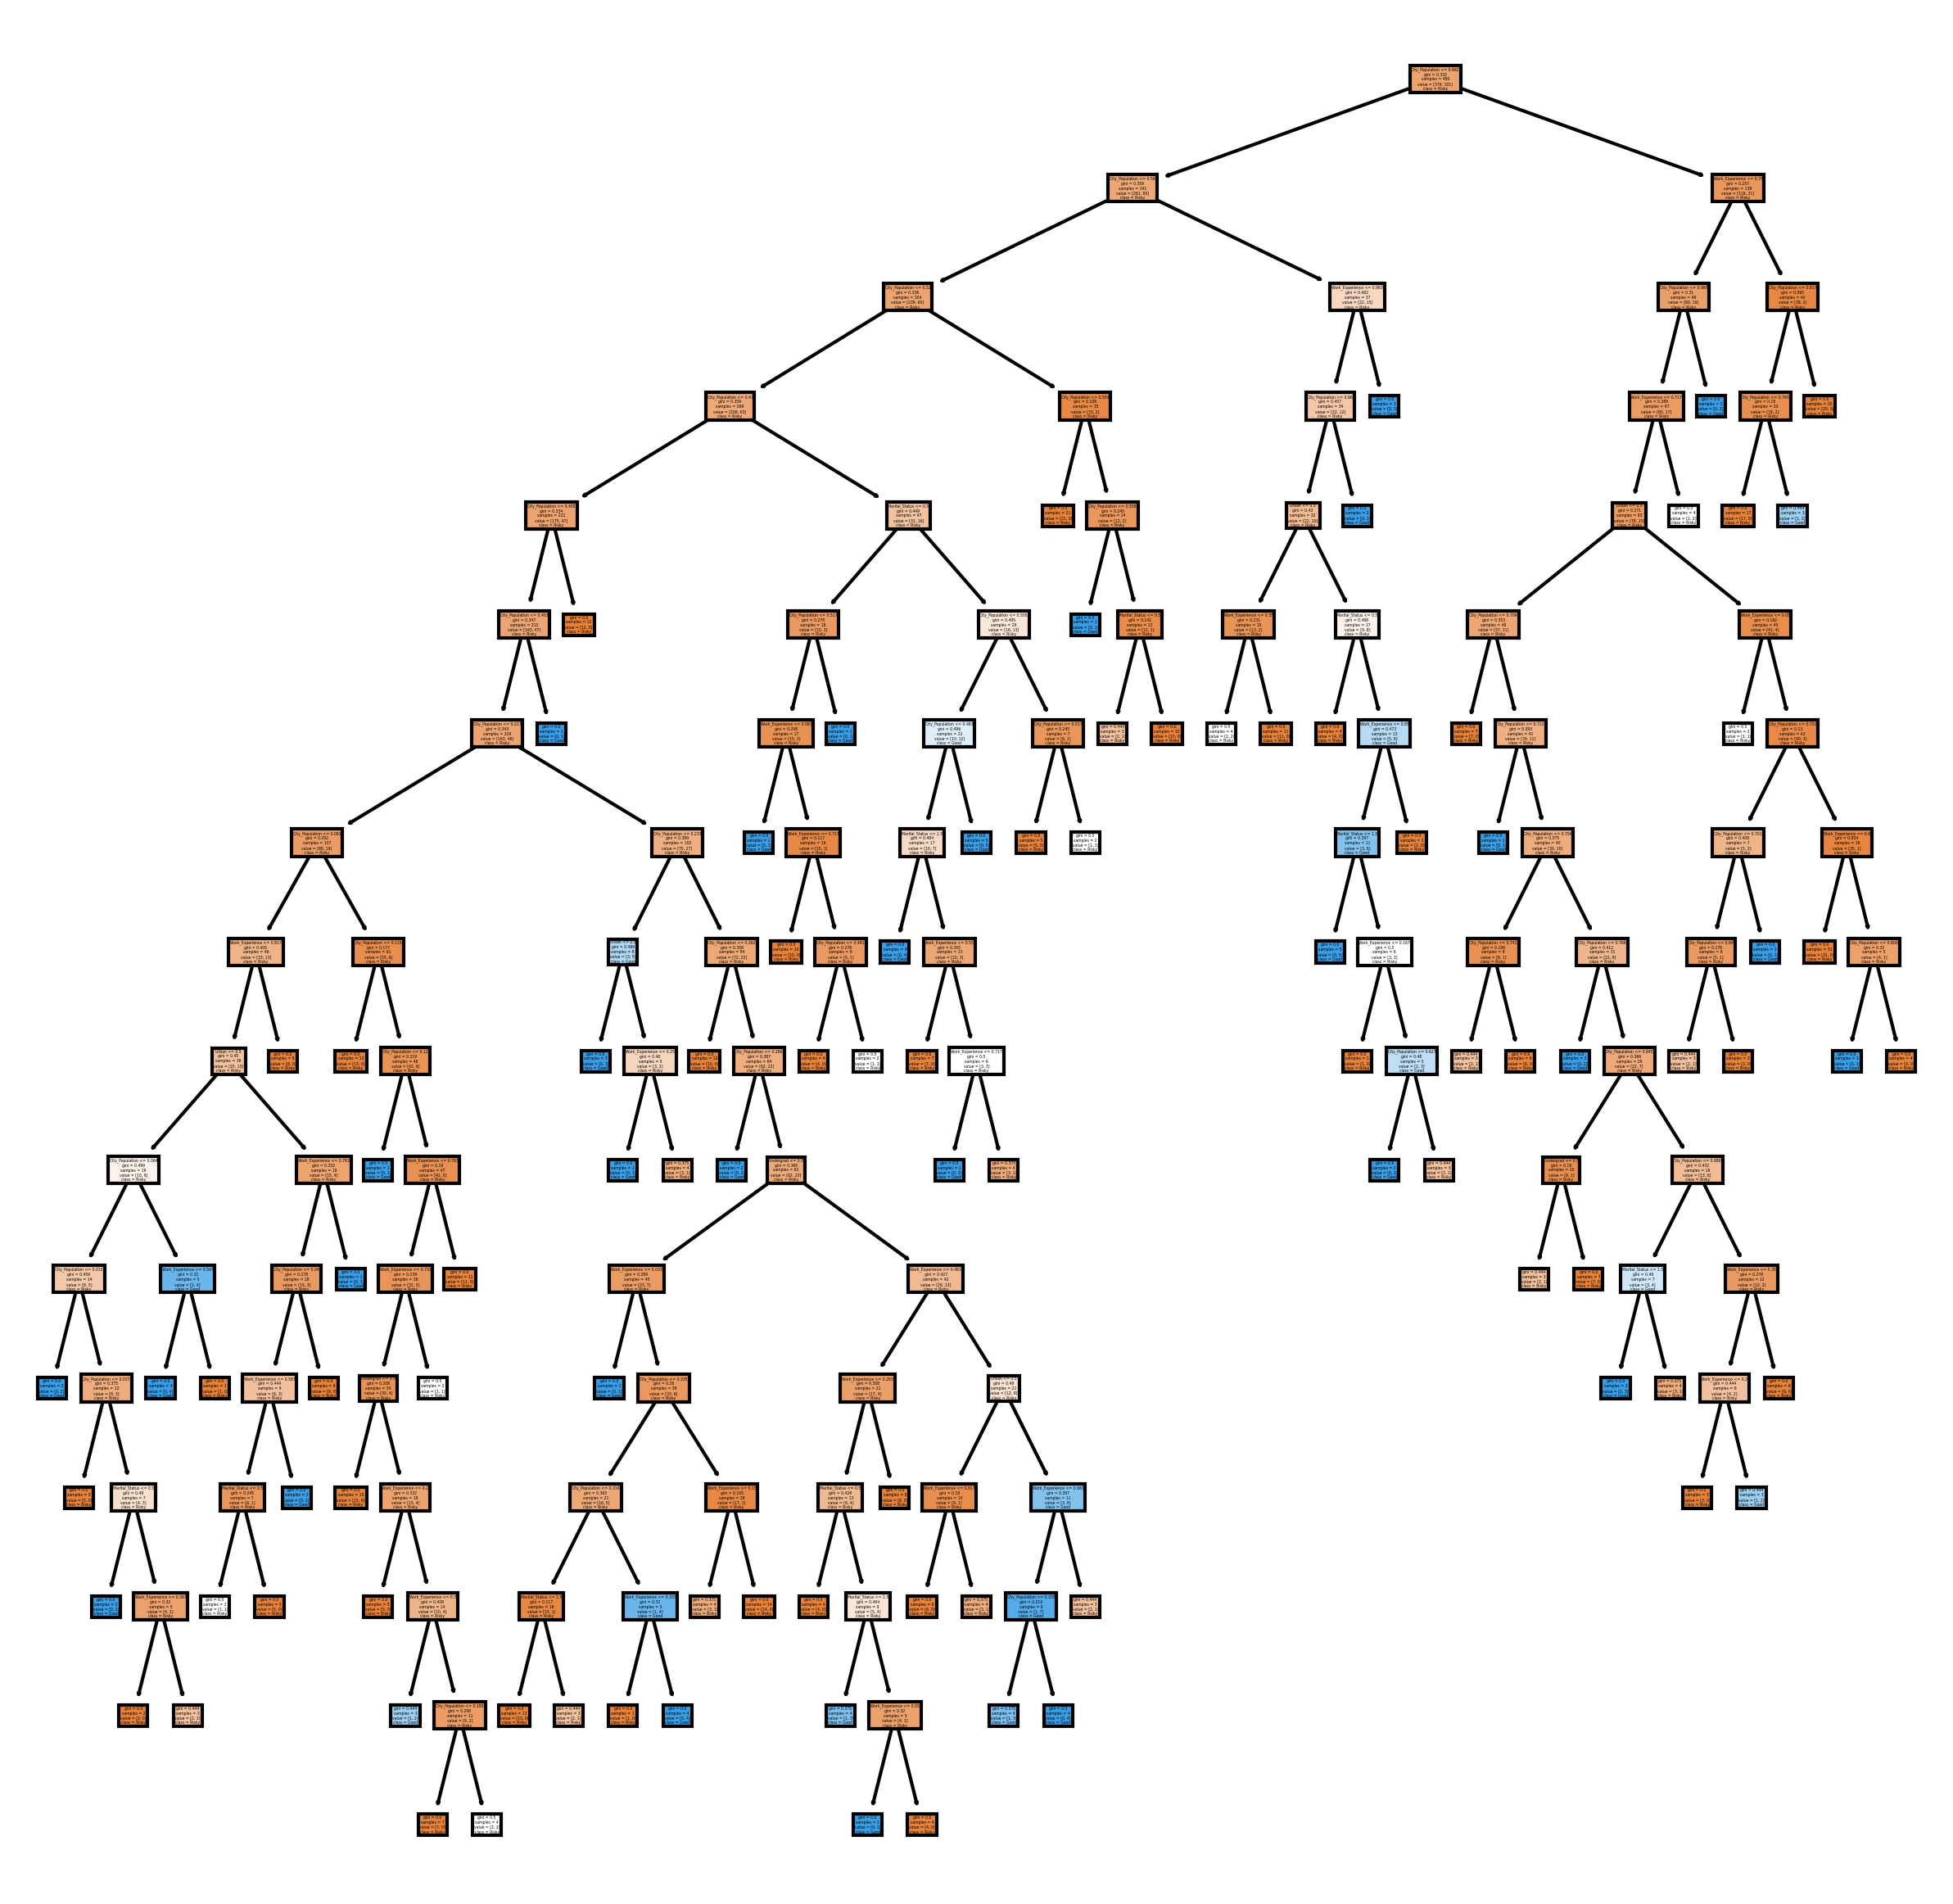

In [23]:
fn=['Undergrad','Marital_Status','Urban','City_Population','Work_Experience']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
predict = model.predict(x_test) 
pd.Series(predict).value_counts()

0    96
1    24
dtype: int64

In [25]:
from sklearn import metrics
metrics.accuracy_score(predict,y_test)

0.625

# Building Decision Tree Classifier (CART) using entropyCriteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

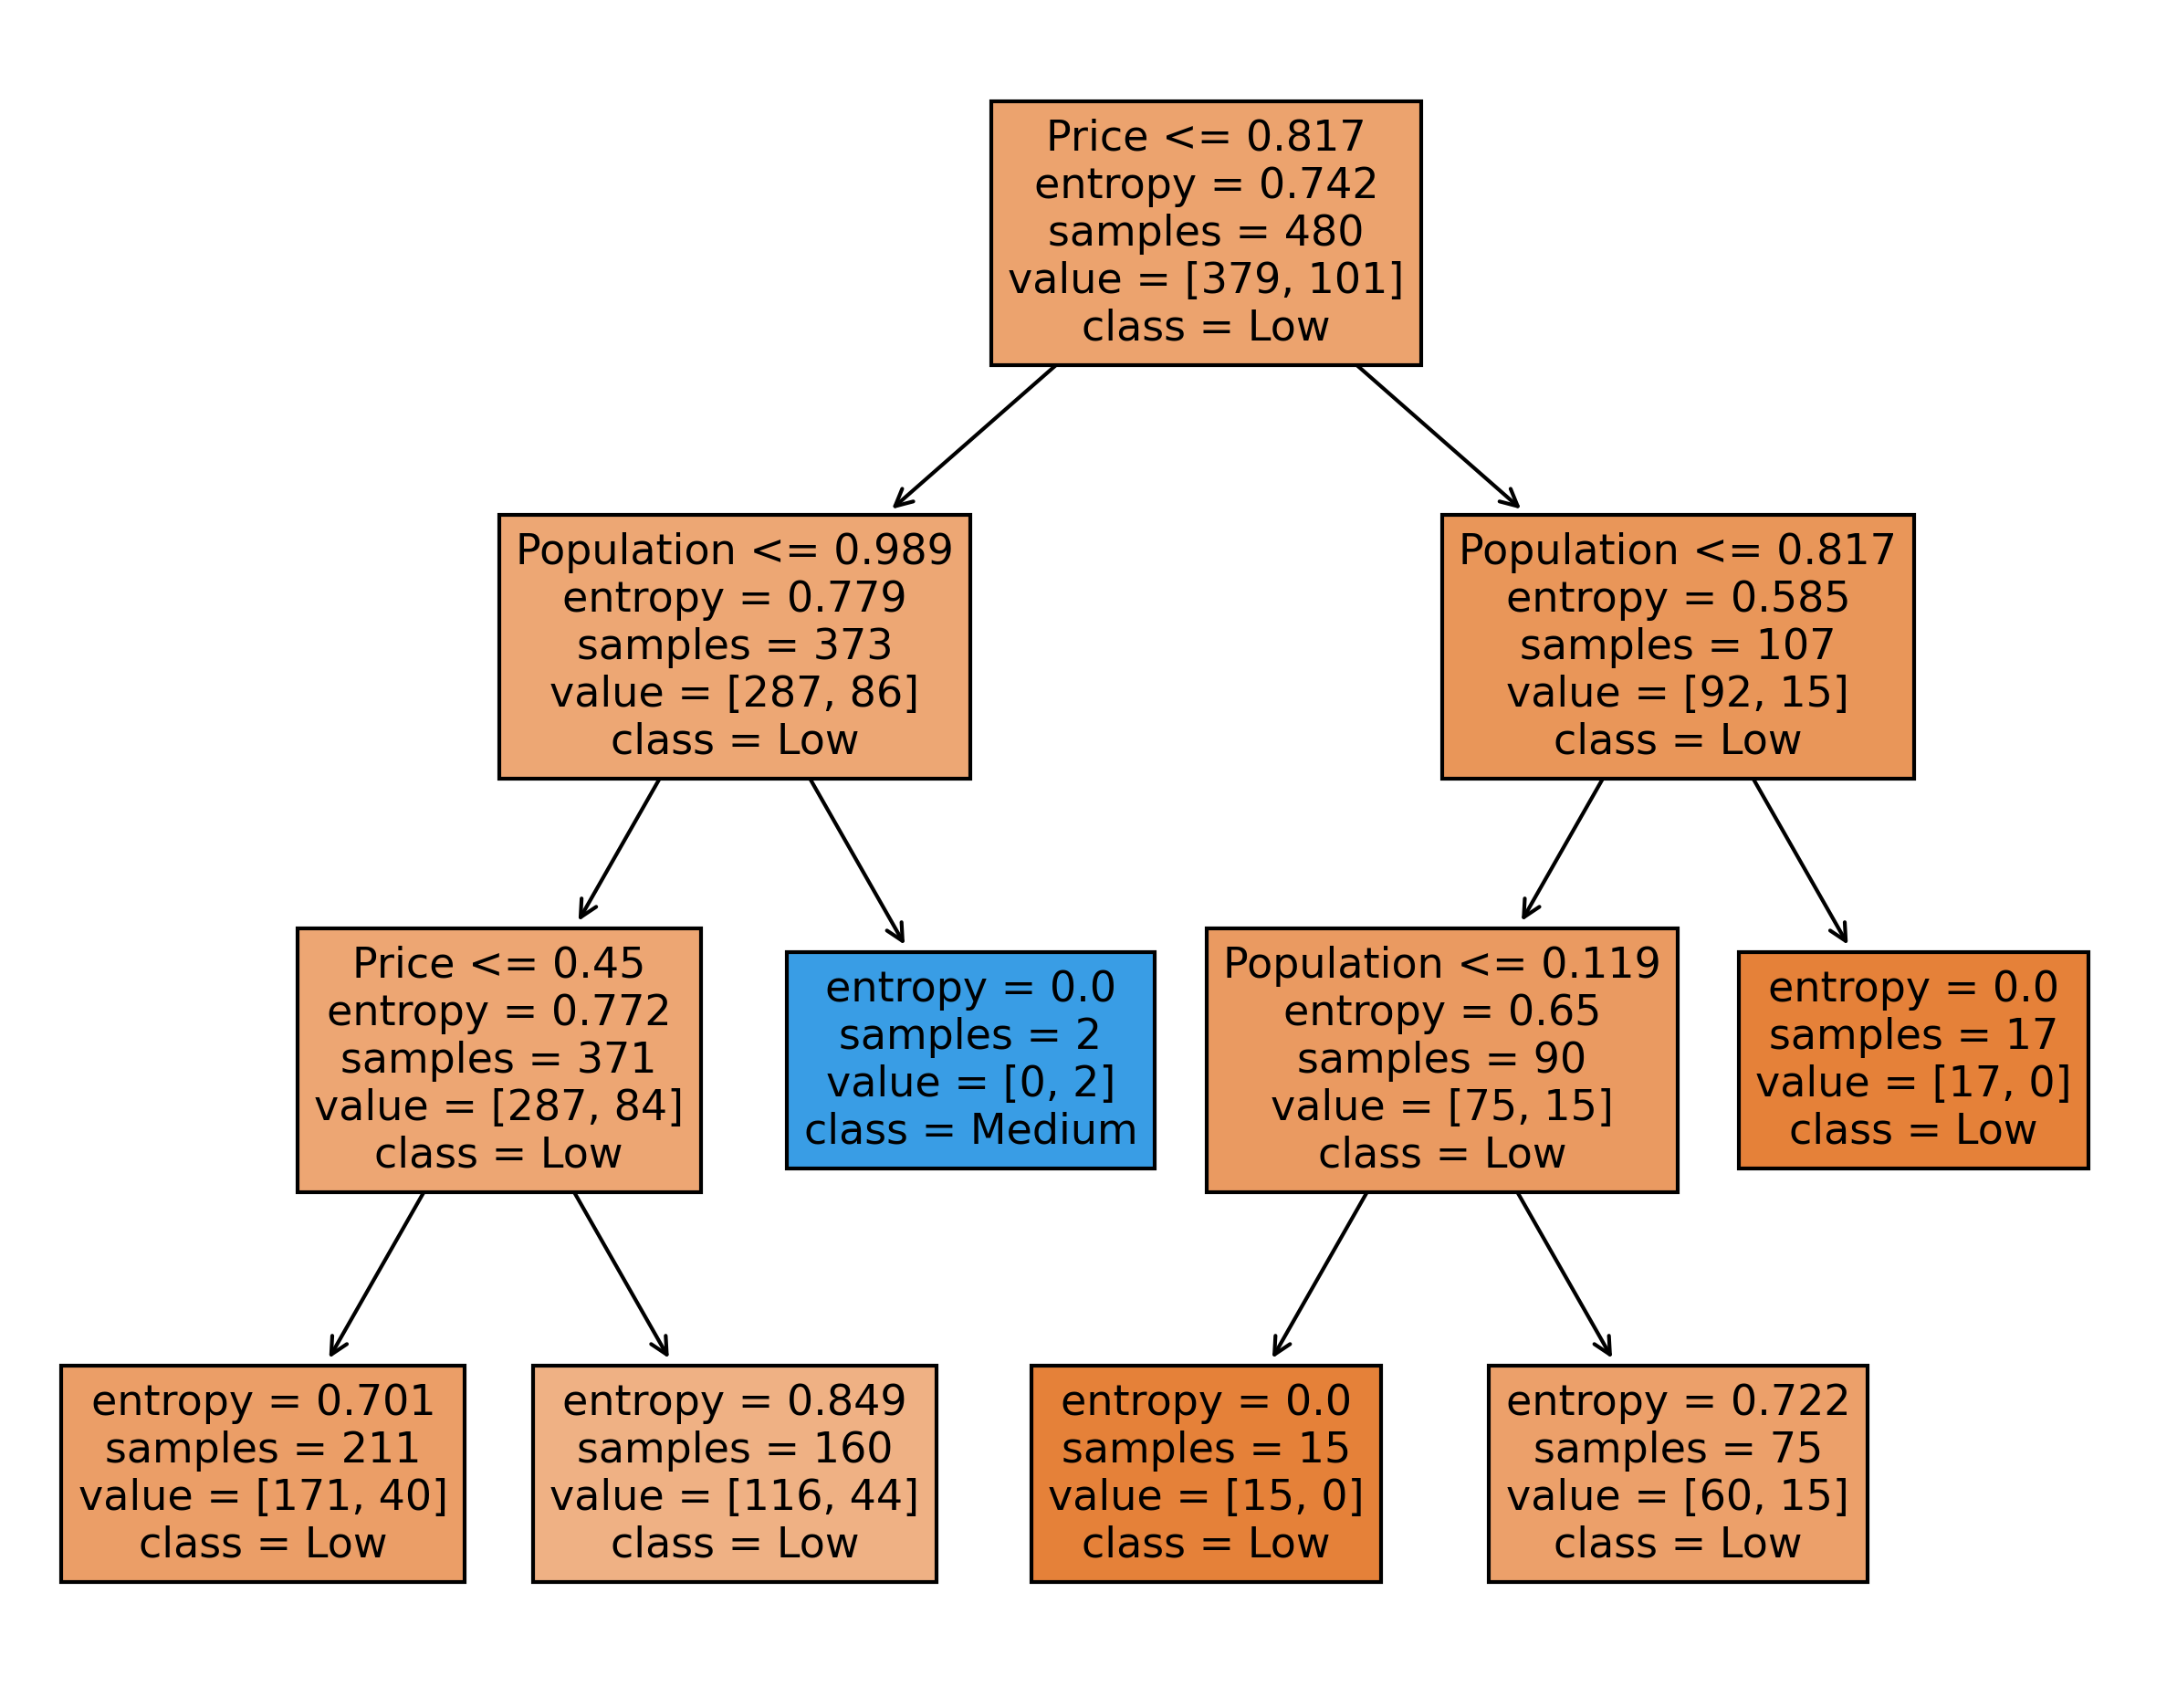

In [28]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
pred=model_gini.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.8

# Tree Pruning

In [30]:
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=6)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [31]:
DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=6,max_features=None,max_leaf_nodes=10,min_samples_leaf=6,
                        min_samples_split=2,min_weight_fraction_leaf=0.0,random_state=None,splitter='random')

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=6,
                       splitter='random')

In [35]:
predict1=dtree.predict(x_test)

In [36]:
metrics.accuracy_score(predict1,y_test)

0.8083333333333333

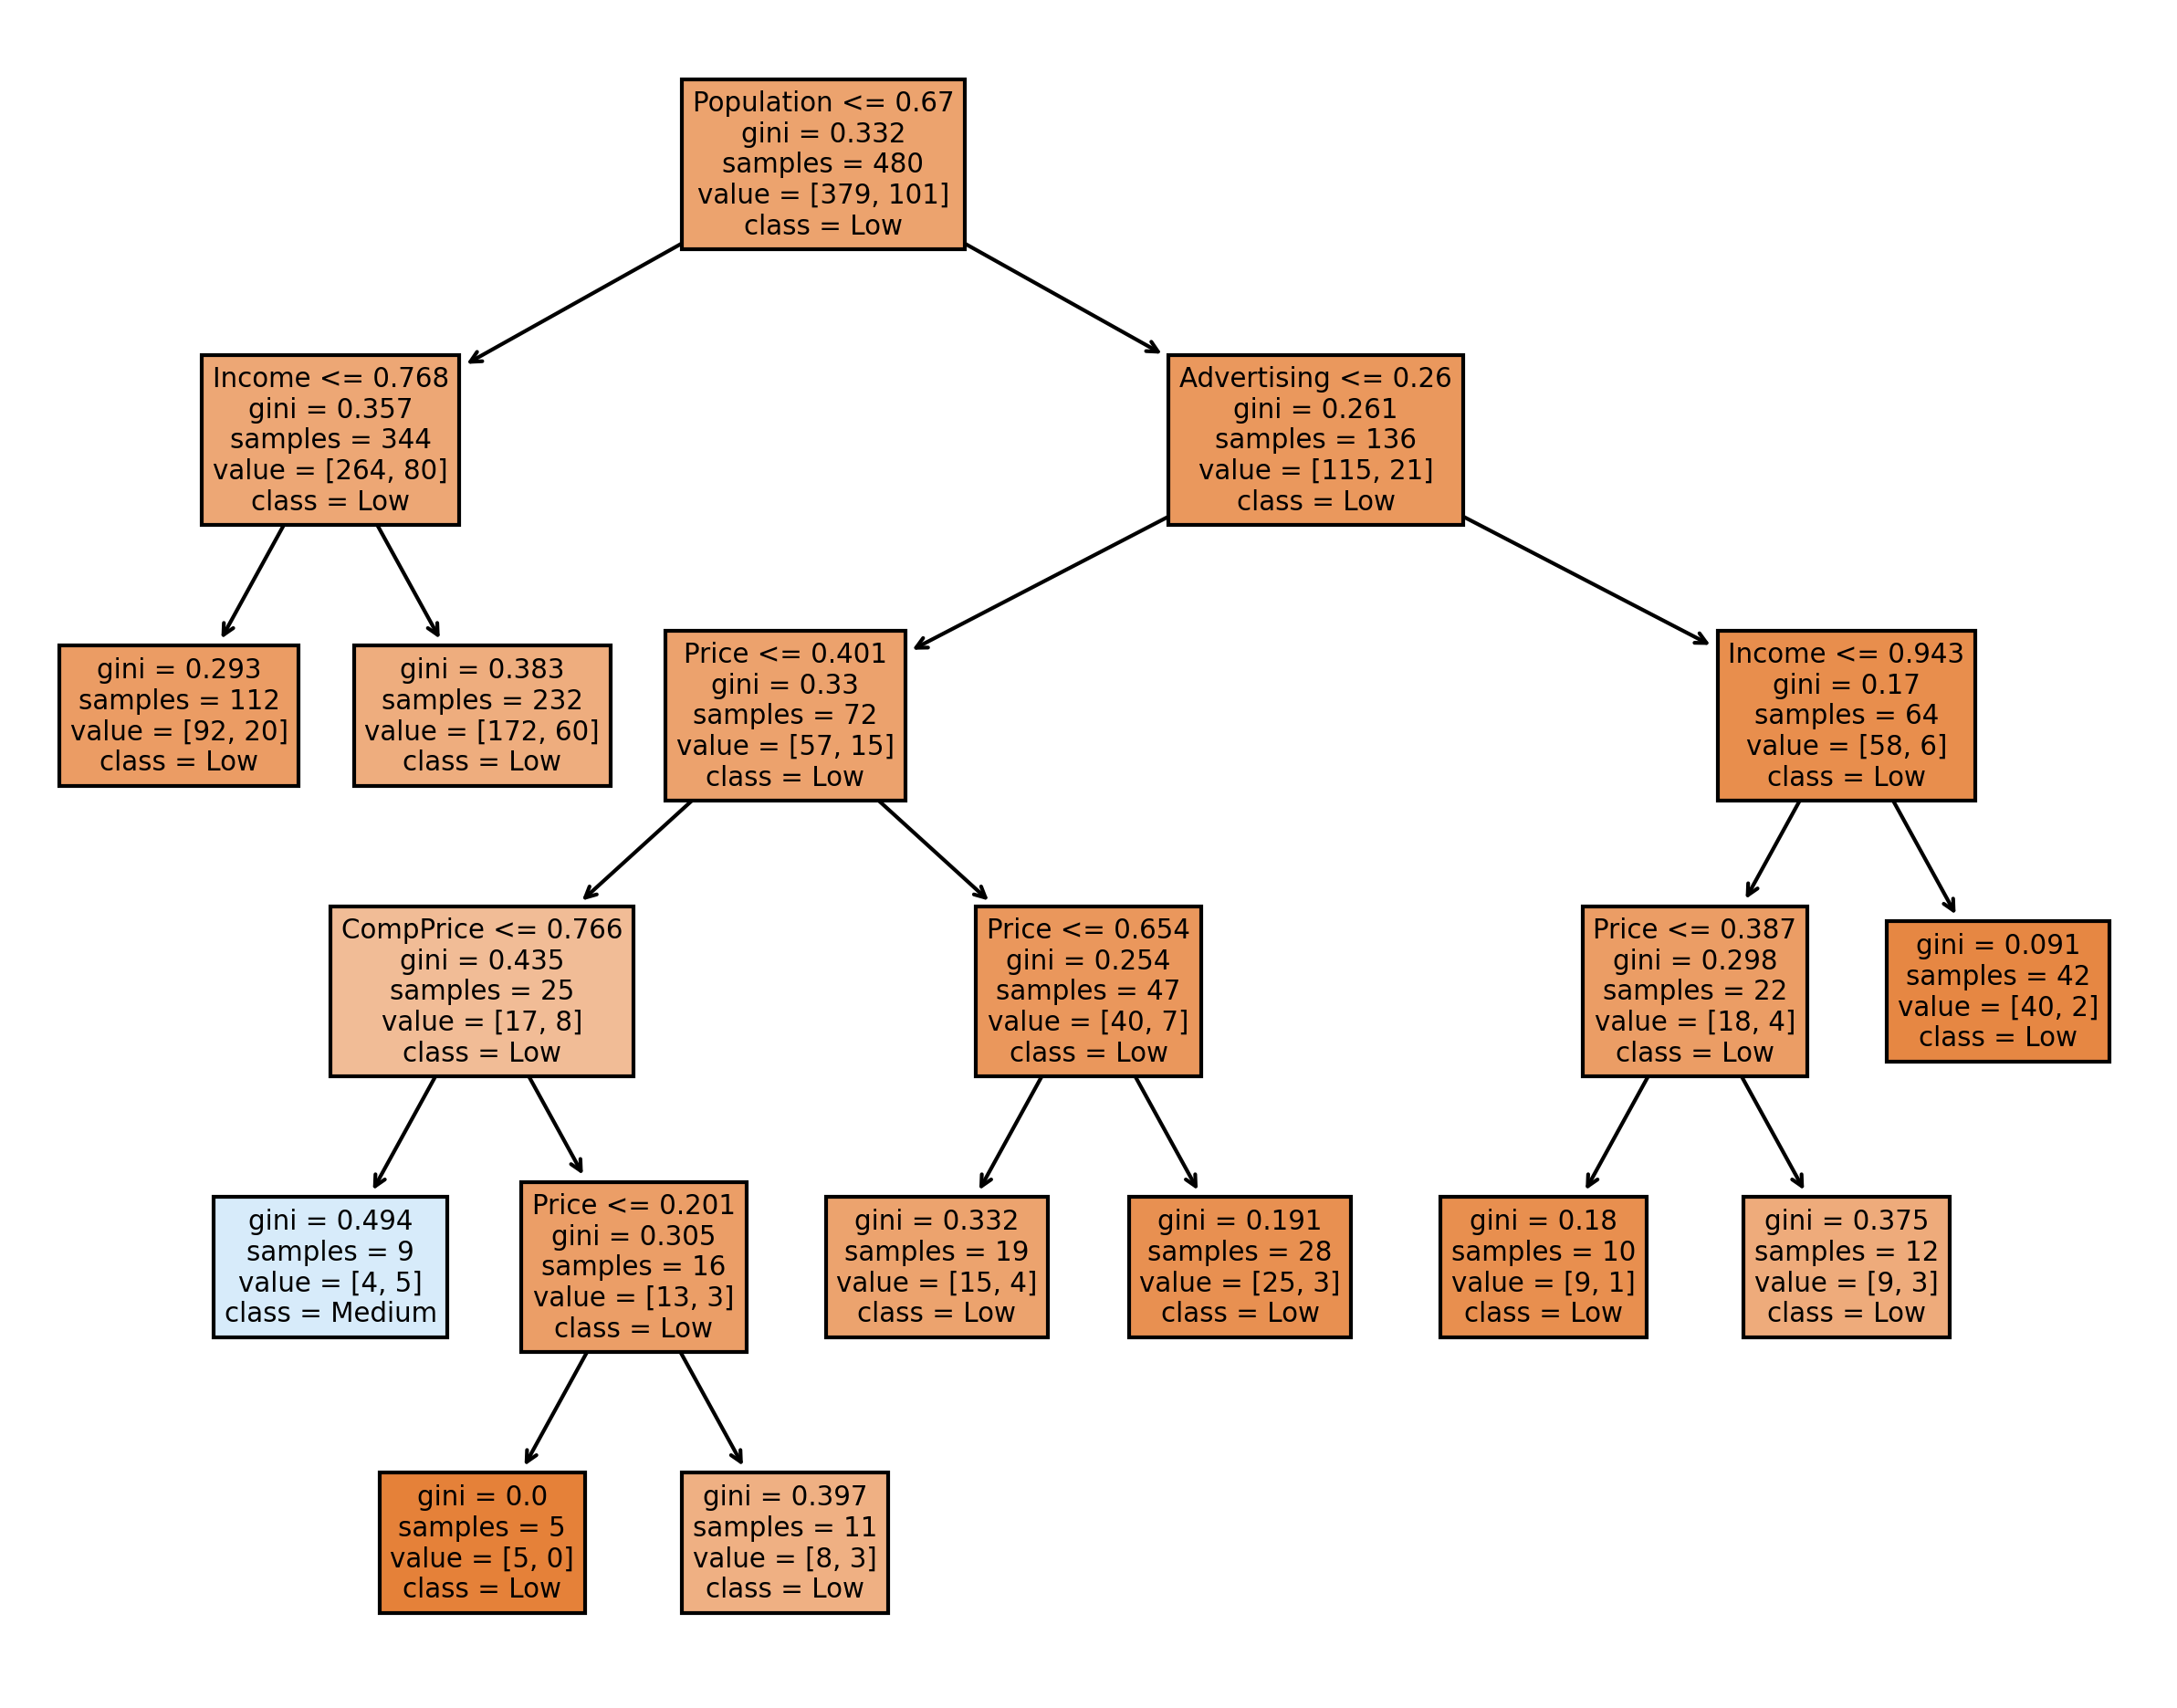

In [37]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);